In [1]:
#install packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install missingno

You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#import
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import seaborn

In [4]:
#load excel file
data = pd.read_csv('C:/Users/blien/Documents/WGU/D206/Medical/medical_data.csv',dtype={'locationid':np.int64}) 
data.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#removing unnecessary column at beginning
del data[data.columns[0]]

In [6]:
#Gather information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
CaseOrder             10000 non-null int64
Customer_id           10000 non-null object
Interaction           10000 non-null object
UID                   10000 non-null object
City                  10000 non-null object
State                 10000 non-null object
County                10000 non-null object
Zip                   10000 non-null int64
Lat                   10000 non-null float64
Lng                   10000 non-null float64
Population            10000 non-null int64
Area                  10000 non-null object
Timezone              10000 non-null object
Job                   10000 non-null object
Children              7412 non-null float64
Age                   7586 non-null float64
Education             10000 non-null object
Employment            10000 non-null object
Income                7536 non-null float64
Marital               10000 non-null object
Gender       

In [7]:
#renaming columns to better describe them
data.rename(columns = {'Item1':'Timely admission',
'Item2':'Timely treatment',
'Item3':'Timely visits',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Hours of treatment',
'Item7':'Courteous staff',
'Item8':'Active listening from Doctor'},
inplace=True)

In [8]:
#testing for duplicates across all rows
med_duplicates = data.duplicated()
print(med_duplicates)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [9]:
#checking to see if there are duplicates
data.duplicated().sum()

0

In [10]:
#testing to see which rows are duplicated
data[med_duplicates]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Timely admission,Timely treatment,Timely visits,Reliability,Options,Hours of treatment,Courteous staff,Active listening from Doctor


In [11]:
#identify how many records are null in each field
data_nulls = data.isnull().sum()
print(data_nulls)

CaseOrder                          0
Customer_id                        0
Interaction                        0
UID                                0
City                               0
State                              0
County                             0
Zip                                0
Lat                                0
Lng                                0
Population                         0
Area                               0
Timezone                           0
Job                                0
Children                        2588
Age                             2414
Education                          0
Employment                         0
Income                          2464
Marital                            0
Gender                             0
ReAdmis                            0
VitD_levels                        0
Doc_visits                         0
Full_meals_eaten                   0
VitD_supp                          0
Soft_drink                      2467
I

In [12]:
#store these missing values
missing_values = data.isnull().any(axis= 1)
data[missing_values]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Timely admission,Timely treatment,Timely visits,Reliability,Options,Hours of treatment,Courteous staff,Active listening from Doctor
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,...,2774.089920,12742.589910,4,5,4,4,3,5,4,6
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,...,3533.292197,16815.513600,4,3,3,2,3,4,5,5
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,...,3316.400250,6930.572138,1,2,2,5,4,2,4,2
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,...,2922.759667,8363.187290,3,3,2,3,3,3,4,2
11,12,X459469,cc050bb7-3b61-4934-b0fe-61bd0ec79dfd,5e1aa1c71a30c77a542c68452793b986,Casselberry,FL,Seminole,32707,28.66268,-81.31427,...,14804.319330,21480.886130,4,5,5,5,3,3,3,3


In [13]:
#identify whether fields have any NA values 
data.isna().any()

CaseOrder                       False
Customer_id                     False
Interaction                     False
UID                             False
City                            False
State                           False
County                          False
Zip                             False
Lat                             False
Lng                             False
Population                      False
Area                            False
Timezone                        False
Job                             False
Children                         True
Age                              True
Education                       False
Employment                      False
Income                           True
Marital                         False
Gender                          False
ReAdmis                         False
VitD_levels                     False
Doc_visits                      False
Full_meals_eaten                False
VitD_supp                       False
Soft_drink  

In [14]:
#looking over the data types of our variables
data.dtypes

CaseOrder                         int64
Customer_id                      object
Interaction                      object
UID                              object
City                             object
State                            object
County                           object
Zip                               int64
Lat                             float64
Lng                             float64
Population                        int64
Area                             object
Timezone                         object
Job                              object
Children                        float64
Age                             float64
Education                        object
Employment                       object
Income                          float64
Marital                          object
Gender                           object
ReAdmis                          object
VitD_levels                     float64
Doc_visits                        int64
Full_meals_eaten                  int64


In [15]:
# Examine columns for misspellings in categorical variables
data['Area'].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [16]:
data['Marital'].unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [67]:
data['Education'].unique()

array(['Some College, Less than 1 Year',
       'Some College, 1 or More Years, No Degree',
       'GED or Alternative Credential', 'Regular High School Diploma',
       "Bachelor's Degree", "Master's Degree",
       'Nursery School to 8th Grade',
       '9th Grade to 12th Grade, No Diploma', 'Doctorate Degree',
       "Associate's Degree", 'Professional School Degree',
       'No Schooling Completed'], dtype=object)

In [17]:
data['Employment'].unique()

array(['Full Time', 'Retired', 'Unemployed', 'Student', 'Part Time'],
      dtype=object)

In [18]:
data['Services'].unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [19]:
data['Age'].unique()

array([53., 51., 78., 22., 76., 50., 40., 48., 55., 64., 41., 45., 85.,
       nan, 44., 54., 72., 84., 52., 31., 75., 70., 56., 32., 86., 65.,
       79., 25., 58., 60., 33., 83., 66., 73., 43., 63., 57., 36., 39.,
       20., 47., 18., 59., 69., 82., 26., 34., 74., 37., 77., 27., 89.,
       30., 87., 23., 29., 80., 19., 67., 24., 88., 62., 49., 71., 21.,
       61., 81., 42., 35., 38., 28., 68., 46.])

In [20]:
data['State'].unique()

array(['AL', 'FL', 'SD', 'MN', 'VA', 'OK', 'OH', 'MS', 'WI', 'IA', 'CA',
       'IN', 'MO', 'MI', 'NE', 'PA', 'AR', 'WV', 'KS', 'MA', 'KY', 'NY',
       'VT', 'DC', 'IL', 'ND', 'SC', 'AK', 'NM', 'NH', 'GA', 'NC', 'MD',
       'TN', 'WA', 'TX', 'CO', 'NJ', 'LA', 'OR', 'AZ', 'ME', 'ID', 'UT',
       'RI', 'MT', 'PR', 'NV', 'CT', 'HI', 'WY', 'DE'], dtype=object)

In [21]:
data['Soft_drink'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [22]:
data['Complication_risk'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [23]:
#reexpressing variables from (T/F) to numeric
data['CR_numeric'] = data['Complication_risk']
dict_CR = {'CR_numeric':{'Low': 0, 'Medium': 1, 'High': 2, 'unknown': np.NaN}}
data.replace(dict_CR, inplace = True)
data['CR_numeric'].unique()

array([1, 2, 0], dtype=int64)

In [24]:
data['SoftD_numeric'] = data['Soft_drink']
dict_SoftD = {'SoftD_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_SoftD, inplace = True)
data['SoftD_numeric'].unique()

array([nan,  0.,  1.])

In [25]:
data['ReAd_numeric'] = data['ReAdmis']
dict_ReAd = {'ReAd_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_ReAd, inplace = True)
data['ReAd_numeric'].unique()

array([0, 1], dtype=int64)

In [26]:
data['HB_numeric'] = data['HighBlood']
dict_HB = {'HB_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_HB, inplace = True)
data['HB_numeric'].unique()

array([1, 0], dtype=int64)

In [27]:
data['Stroke_numeric'] = data['Stroke']
dict_Stroke = {'Stroke_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_Stroke, inplace = True)
data['Stroke_numeric'].unique()

array([0, 1], dtype=int64)

In [28]:
data['Art_numeric'] = data['Arthritis']
dict_Art = {'Art_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_Art, inplace = True)
data['Art_numeric'].unique()

array([1, 0], dtype=int64)

In [29]:
data['Diabetes_numeric'] = data['Diabetes']
dict_Diabetes = {'Diabetes_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_Diabetes, inplace = True)
data['Diabetes_numeric'].unique()

array([1, 0], dtype=int64)

In [30]:
data['Hyper_numeric'] = data['Hyperlipidemia']
dict_Hyper = {'Hyper_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_Hyper, inplace = True)
data['Hyper_numeric'].unique()

array([0, 1], dtype=int64)

In [31]:
data['BP_numeric'] = data['BackPain']
dict_Back = {'BP_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_Back, inplace = True)
data['BP_numeric'].unique()

array([1, 0], dtype=int64)

In [32]:
data['AR_numeric'] = data['Allergic_rhinitis']
dict_AR = {'AR_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_AR, inplace = True)
data['AR_numeric'].unique()

array([1, 0], dtype=int64)

In [33]:
data['RE_numeric'] = data['Reflux_esophagitis']
dict_RE = {'RE_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_RE, inplace = True)
data['RE_numeric'].unique()

array([0, 1], dtype=int64)

In [34]:
data['Ast_numeric'] = data['Asthma']
dict_Ast = {'Ast_numeric':{'No': 0, 'Yes': 1, 'unknown': np.NaN}}
data.replace(dict_Ast, inplace = True)
data['Ast_numeric'].unique()

array([1, 0], dtype=int64)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 64 columns):
CaseOrder                       10000 non-null int64
Customer_id                     10000 non-null object
Interaction                     10000 non-null object
UID                             10000 non-null object
City                            10000 non-null object
State                           10000 non-null object
County                          10000 non-null object
Zip                             10000 non-null int64
Lat                             10000 non-null float64
Lng                             10000 non-null float64
Population                      10000 non-null int64
Area                            10000 non-null object
Timezone                        10000 non-null object
Job                             10000 non-null object
Children                        7412 non-null float64
Age                             7586 non-null float64
Education                    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A3CF610>,
      dtype=object)

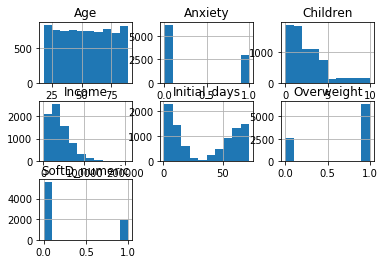

In [36]:
# Create intial histograms of important variables
data.hist(['Children', 'Age', 'Income', 'SoftD_numeric', 'Overweight','Anxiety','Initial_days'])

In [37]:
#print which variables have nulls
print(data_nulls)

CaseOrder                          0
Customer_id                        0
Interaction                        0
UID                                0
City                               0
State                              0
County                             0
Zip                                0
Lat                                0
Lng                                0
Population                         0
Area                               0
Timezone                           0
Job                                0
Children                        2588
Age                             2414
Education                          0
Employment                         0
Income                          2464
Marital                            0
Gender                             0
ReAdmis                            0
VitD_levels                        0
Doc_visits                         0
Full_meals_eaten                   0
VitD_supp                          0
Soft_drink                      2467
I

In [38]:
#perfoming the imputation on our variables
data['Children'] = data['Children'].fillna(data['Children'].median())
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Anxiety'] = data['Anxiety'].fillna(data['Anxiety'].median())
data['Initial_days'] = data['Initial_days'].fillna(data['Initial_days'].median())
data['Overweight'] = data['Overweight'].fillna(data['Overweight'].median())
data['Soft_drink'] = data['Soft_drink'].fillna(data['Soft_drink'].mode()[0])
data['SoftD_numeric'] = data['SoftD_numeric'].fillna(data['SoftD_numeric'].median())

In [39]:
#testing if there are any remaining null values
data.isnull().sum()

CaseOrder                       0
Customer_id                     0
Interaction                     0
UID                             0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
Timezone                        0
Job                             0
Children                        0
Age                             0
Education                       0
Employment                      0
Income                          0
Marital                         0
Gender                          0
ReAdmis                         0
VitD_levels                     0
Doc_visits                      0
Full_meals_eaten                0
VitD_supp                       0
Soft_drink                      0
Initial_admin                   0
HighBlood                       0
Stroke        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x03910890>,
      dtype=object)

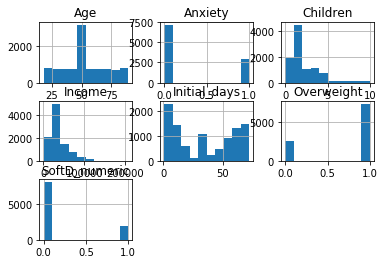

In [40]:
#creating histograms from our null positive variables
data.hist(['Children', 'Age', 'Income', 'SoftD_numeric', 'Overweight','Anxiety','Initial_days'])

In [42]:
df_stats = data

In [43]:
#calculting z score for income variable
df_stats['Z_Score_Income'] = stats.zscore(df_stats['Income'])
df_stats[['Income','Z_Score_Income']].head

<bound method NDFrame.head of          Income  Z_Score_Income
0      86575.93        1.904974
1      46805.99        0.316815
2      14370.14       -0.978466
3      39741.49        0.034704
4       1209.56       -1.504016
5      33942.28       -0.196880
6      10456.05       -1.134770
7      33942.28       -0.196880
8      55586.48        0.667452
9      38965.22        0.003705
10     38503.82       -0.014721
11     14126.30       -0.988204
12     33942.28       -0.196880
13     33942.28       -0.196880
14     41558.19        0.107251
15    103866.49        2.595449
16     24250.51       -0.583907
17     17345.63       -0.859644
18     61723.87        0.912540
19     62054.63        0.925749
20      8686.47       -1.205436
21     10279.73       -1.141811
22     57621.66        0.748724
23     32677.97       -0.247368
24     14925.43       -0.956292
25     54972.25        0.642924
26     54036.35        0.605550
27     33942.28       -0.196880
28     33942.28       -0.196880
29     320

(array([2068., 4990., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([-1.54616546, -0.71915955,  0.10784637,  0.93485228,  1.76185819,
         2.5888641 ,  3.41587002,  4.24287593,  5.06988184,  5.89688776,
         6.72389367]),
 <a list of 10 Patch objects>)

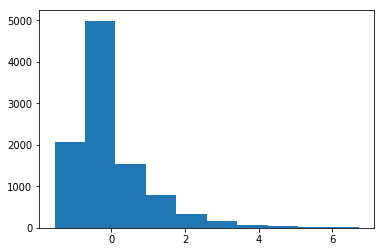

In [44]:
#plotting z score in a histogram
plt.hist(df_stats['Z_Score_Income'])

In [45]:
#calculating z score for Children variable
df_stats['Z_Score_Children']=stats.zscore(df_stats['Children'])
df_stats[['Children','Z_Score_Children']].head

<bound method NDFrame.head of       Children  Z_Score_Children
0          1.0         -0.424650
1          3.0          0.618716
2          3.0          0.618716
3          0.0         -0.946333
4          1.0         -0.424650
5          1.0         -0.424650
6          0.0         -0.946333
7          7.0          2.705447
8          1.0         -0.424650
9          2.0          0.097033
10         4.0          1.140399
11         1.0         -0.424650
12         0.0         -0.946333
13         1.0         -0.424650
14         1.0         -0.424650
15         1.0         -0.424650
16        10.0          4.270496
17         0.0         -0.946333
18         1.0         -0.424650
19         0.0         -0.946333
20         2.0          0.097033
21         4.0          1.140399
22         1.0         -0.424650
23         3.0          0.618716
24         0.0         -0.946333
25         0.0         -0.946333
26         1.0         -0.424650
27         2.0          0.097033
28         2.

(array([1880., 5540.,    0., 1113.,  739.,  126.,  299.,    0.,  157.,
         146.]),
 array([-0.94633266, -0.42464983,  0.09703301,  0.61871584,  1.14039868,
         1.66208151,  2.18376435,  2.70544718,  3.22713002,  3.74881285,
         4.27049569]),
 <a list of 10 Patch objects>)

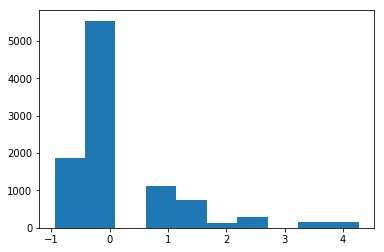

In [46]:
#plotting z score in a histogram
plt.hist(df_stats['Z_Score_Children'])

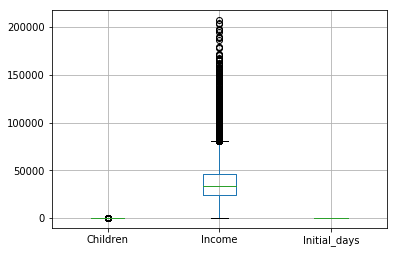

In [47]:
#showing our variables in a boxplot
df_stats.boxplot(['Children', 'Income', 'Initial_days'])

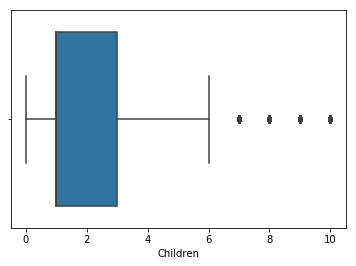

In [48]:
#taking a closer look at children variable in a boxplot
boxplot_children=seaborn.boxplot(x='Children',data=data)

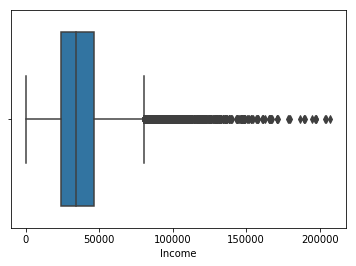

In [49]:
#taking a closer look at income variable in a boxplot
boxplot_income=seaborn.boxplot(x='Income',data=data)

In [50]:
#drop z scores from clean CSV
data.drop(columns=data.columns[-2:], axis=1,  inplace=True)

In [101]:
#export clean data to CSV file
data.to_csv('C:/Users/blien/Documents/WGU/D206/Medical/medical_data_output.csv')

In [51]:
#define features for the PCA
PCA_med = data[['Initial_days', 'Doc_visits', 'TotalCharge', 'Additional_charges', 'Income', 'Hours of treatment', 'Timely admission', 'Timely treatment']]

In [52]:
#normalize the data
med_normalized = ((PCA_med-PCA_med.mean())/PCA_med.std())

In [53]:
#select # of components to extract
pca = PCA(n_components = PCA_med.shape[1])

In [54]:
#Use PCA application and convert the dataset of 8 variables into 8 components
pca.fit(med_normalized)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
#create list of PC names
pca_med = pd.DataFrame(pca.transform(med_normalized), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8'])

In [57]:
#load components
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8'], index = med_normalized.columns)

In [58]:
print(loadings)

                         PC1       PC2       PC3       PC4       PC5  \
Initial_days       -0.067927  0.702916 -0.005912  0.048419 -0.013866   
Doc_visits          0.013170 -0.013377  0.702437  0.024631 -0.710678   
TotalCharge        -0.066782  0.703874  0.017598 -0.001987 -0.001503   
Additional_charges  0.001413  0.030193  0.332969 -0.893297  0.297631   
Income             -0.007276 -0.013811  0.628368  0.445910  0.637098   
Hours of treatment  0.493734  0.054817  0.017187  0.015126 -0.002624   
Timely admission    0.619767  0.051575 -0.012209 -0.000755  0.011359   
Timely treatment    0.602340  0.059363 -0.008791  0.000562  0.011271   

                         PC6       PC7       PC8  
Initial_days        0.026975 -0.697774  0.105387  
Doc_visits          0.022993 -0.003331  0.004350  
TotalCharge        -0.014766  0.700401 -0.094897  
Additional_charges -0.005949 -0.039904  0.005097  
Income              0.013010  0.000732  0.003153  
Hours of treatment -0.862260 -0.038487 -0.087

In [59]:
#Extract the eigenvalues
cov_matrix = np.dot(med_normalized.T, med_normalized)/ PCA_med.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

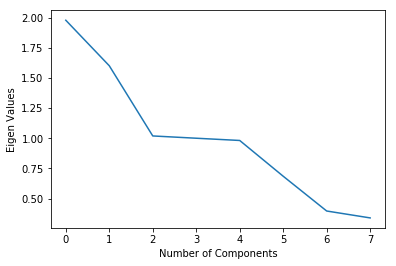

In [60]:
#plot the eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigen Values')
plt.show()